# NDMM BMMC Non-dara Cell Frequency Alluvial Plots

In [1]:
if (!requireNamespace("ggalluvial", quietly = TRUE)) {
  install.packages("ggalluvial")
}

library(ggplot2)
library(ggalluvial)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(rlang)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# Function to process data and create plot
create_plot <- function(df, label_column, title) {
  df <- df %>%
    group_by(sample.visitDetails) %>%
    mutate(norm_per_visit = frequency / sum(frequency))

  ## Adjust your X axis order here
  df$sample.visitDetails <- factor(df$sample.visitDetails, levels = c(
    'MM Pre-Treatment',
    'MM End Induction 1st Draw',
    'MM Post Transplant 90 Days', 
    'MM Post Transplant 1 year',
    'MM Post Transplant 2 year'
  ))

  ## Automated colormap  
  combined_colors <- c(brewer.pal(12, "Paired"), brewer.pal(8, "Set1"))  # only 20 colors, adjust this for more colors
  label_cmap <- combined_colors[1:length(unique(df[[label_column]]))]
  
  ggplot(df, aes(x = sample.visitDetails, stratum = !!sym(label_column), 
                 alluvium = !!sym(label_column), y = norm_per_visit, 
                 fill = !!sym(label_column))) +
    geom_alluvium(width = 0.1, alpha = 0.7) +  
    geom_stratum(width = 0.6) +  
    scale_fill_manual(values = label_cmap) +
    scale_x_discrete(guide = guide_axis(n.dodge = 2)) + 
    theme_minimal(base_size = 14) +
    theme(legend.position = "right", legend.margin = margin(0, 20, 0, 0)) + 
    labs(x = "Sample Visit", y = "Normalized Frequency") +  
    guides(fill = guide_legend(title = NULL)) +  
    ggtitle(title)
}


## B Cell Frequency Plots (L2 and L3)

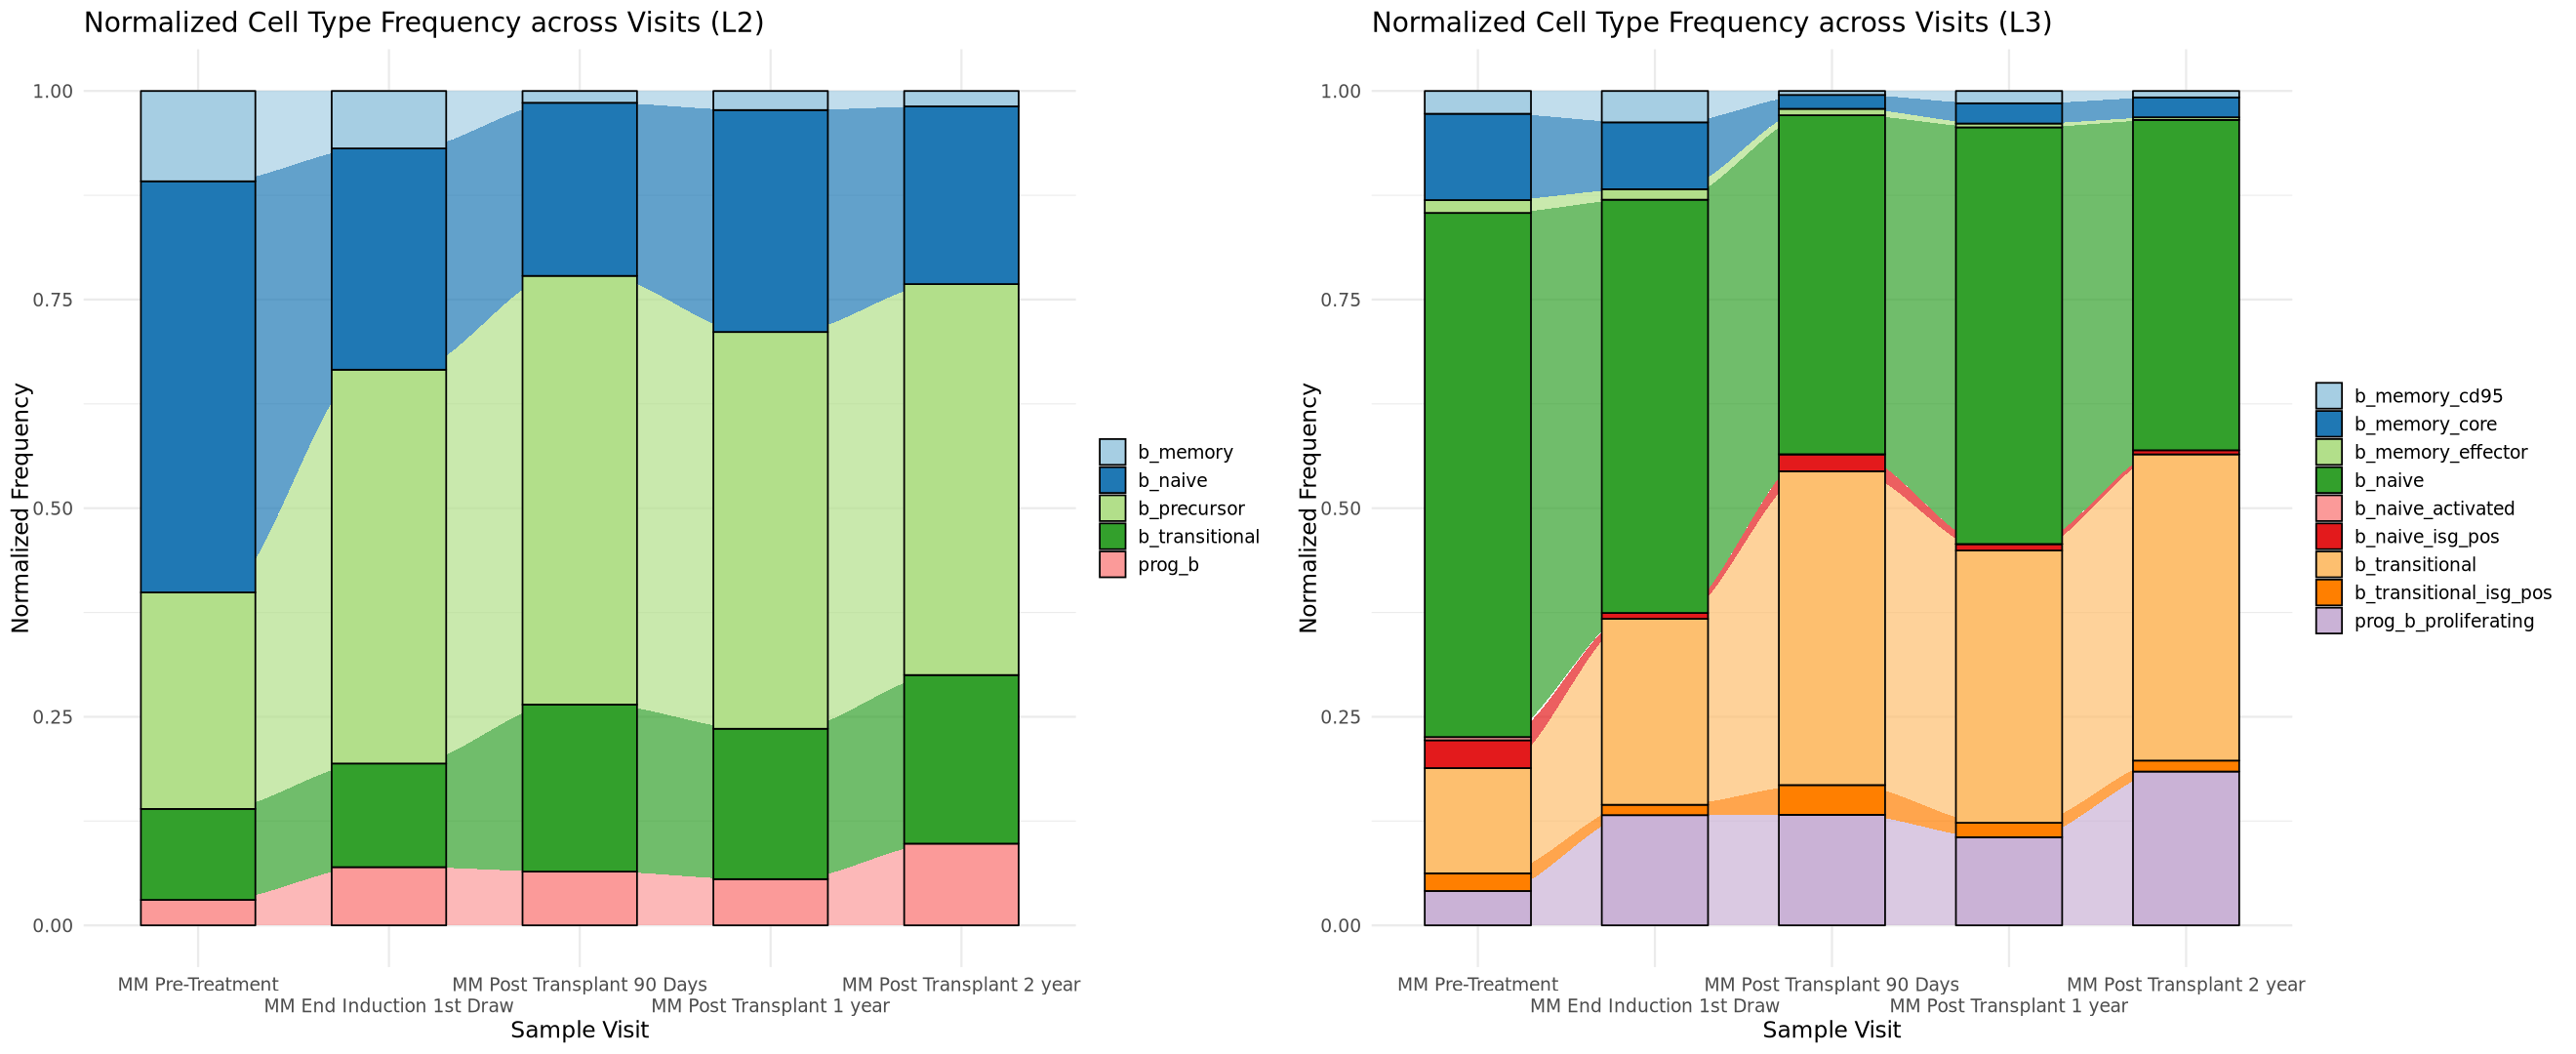

In [3]:
df_l3 <- read.csv('l3_alu_b_cells.csv')
df_l2 <- read.csv('l2_alu_b_cells.csv')

plot_l2 <- create_plot(df_l2, "manual.label_l2", "Normalized Cell Type Frequency across Visits (L2)")
plot_l3 <- create_plot(df_l3, "manual.label_l3", "Normalized Cell Type Frequency across Visits (L3)")

options(repr.plot.width = 22, repr.plot.height = 9)  
grid.arrange(plot_l2, plot_l3, ncol = 2)